# SVM Kernel No Lineal
Abordar problemas de clasificación no lineal

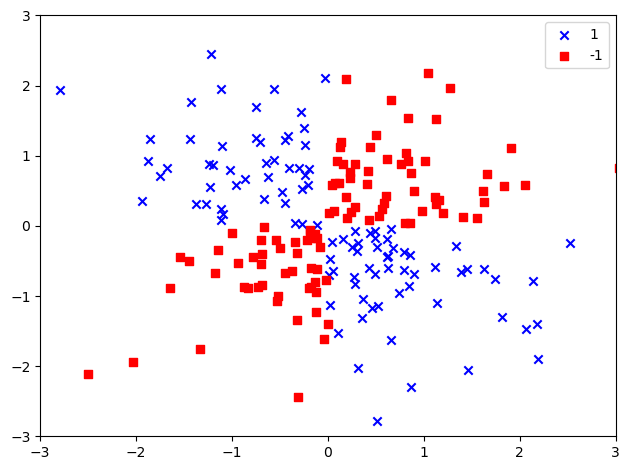

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1,1],c='r',marker='s',label='-1')


plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Función de kernel
 
Kernel Gaussiano

In [5]:


from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
        marker=markers[idx],label=cl,edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],X_test[:, 1],c='ghostwhite',edgecolor='black', alpha=1.0,linewidth=1,marker='o',s=100,label='test set')

C:\Users\cmoya\AppData\Local\Temp\ipykernel_10912\39781136.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


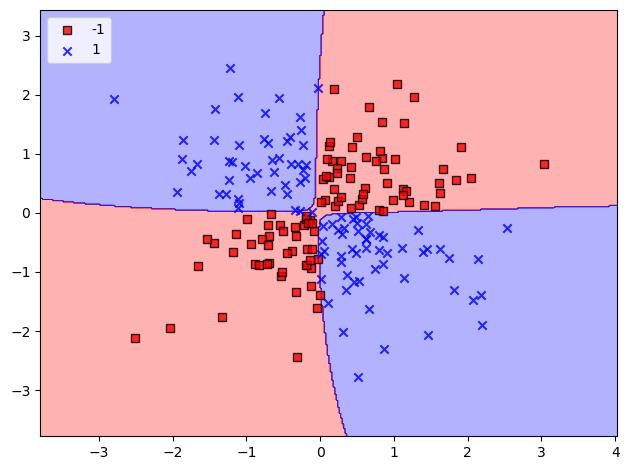

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10000.0)
#parametro c -> margen de separacion de las clases
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# SVM con datos reales

In [6]:


from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Cantidad de etiquetas en y:', np.bincount(y))
print('Cantidad de etiquetas en y_train:', np.bincount(y_train))
print('Cantidad de etiquetas en y_test:', np.bincount(y_test))


Cantidad de etiquetas en y: [50 50 50]
Cantidad de etiquetas en y_train: [35 35 35]
Cantidad de etiquetas en y_test: [15 15 15]


C:\Users\cmoya\AppData\Local\Temp\ipykernel_2512\4024066129.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


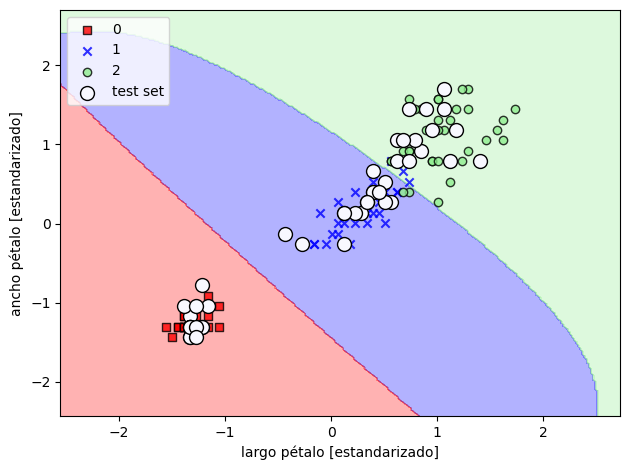

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,classifier=svm, test_idx=range(105, 150))
plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()


In [8]:
svm.predict(X_test_std)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

C:\Users\cmoya\AppData\Local\Temp\ipykernel_2512\4024066129.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


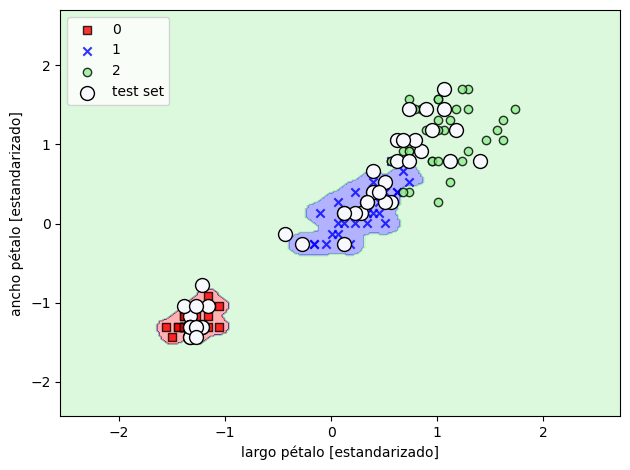

In [9]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=svm, test_idx=range(105, 150))
plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()


# Random Forest - Árboles de decisión
# Hiperparámetros

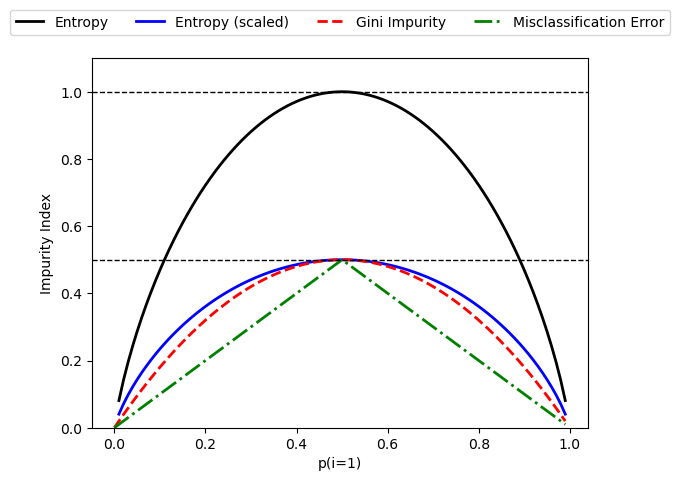

In [10]:


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
['Entropy','Entropy (scaled)','Gini Impurity','Misclassification Error'],
['-', '-', '--', '-.'],['black', 'blue', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=5,fancybox=True,shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()



C:\Users\cmoya\AppData\Local\Temp\ipykernel_2512\4024066129.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


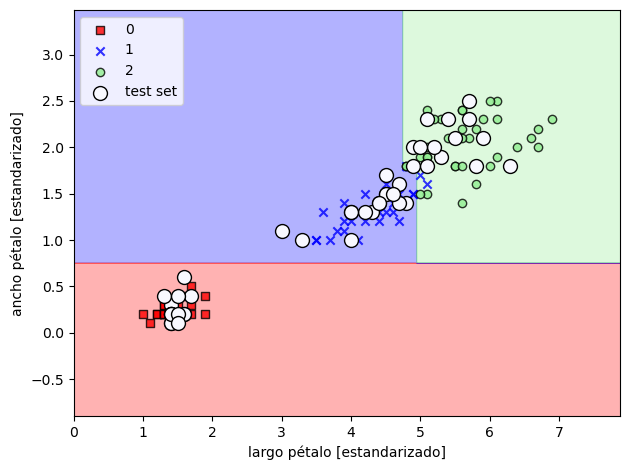

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,classifier=tree,test_idx=range(105, 150))

plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()


# Combinando múltiples árboles mediante Random Forest

C:\Users\cmoya\AppData\Local\Temp\ipykernel_2512\4024066129.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


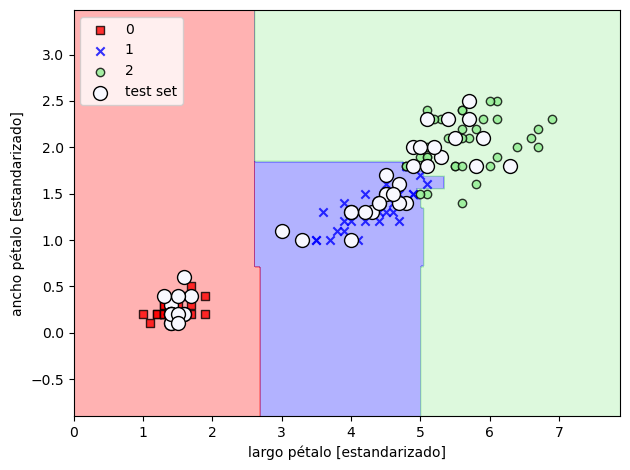

In [12]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,classifier=forest, test_idx=range(105, 150))

plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()


In [9]:
# K-Vecinos más cercanos (KNN)
# Distancia euclediana 
# Numero de vecinos
# Métrica de distancia
# ver .cosine


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', n_jobs=-1)
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=knn,test_idx=range(105, 150))

plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

NameError: name 'X_train_std' is not defined